<a href="https://colab.research.google.com/github/mahynski/chemometric-carpentry/blob/main/notebooks/2_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
❓ ***Objective***: This notebook will introduce the basic techniques used when creating and optimizing predictive models.  Some steps will be reviewed in much more detail later.

🔁 ***Remember***: You can always revisit this notebook for reference again in the future.  Ideas and best practices will be reinforced in future notebooks, so don't worry about remembering everything the first time you see something new.

🧑 Author: Nathan A. Mahynski

📆 Date: May 8, 2024

---

# Exploratory Data Analysis (EDA)

👆 [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is the first step in the modeling process.  

The basic purpose of EDA is start to "play" with your data.  It is usually a very visual process which is meant to generate hypotheses and alert the modeler to (unexpected) trends. The term ["statistical graphics"](https://en.wikipedia.org/wiki/Statistical_graphics) is often used interchangeably with, [though it is different](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm). The term is attributed to John Tukey, who wrote the book entitled ["Exploratory Data Analysis"](https://en.wikipedia.org/wiki/Exploratory_data_analysis#cite_note-Tukey1977-6) in 1977.  

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Data_visualization_process_v1.png" align="right" height=300 />

👉 EDA is a philosophy 🤔 not a set of techniques! Nonetheless, EDA is usually done by making lots of different plots of the data to help the human observing the data to recognize patterns.

[NIST has some great resources on EDA.](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)  Here is a direct quote:

> "Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis  that employs a variety of techniques (mostly graphical) to:
* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models and
* determine optimal factor settings."

EDA should not be confused with ["initial data analysis" (IDA)](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis) which is a more narrow term that encompasses data cleaning (handling missing values, data transformations, etc.); in fact, IDA is part of EDA.

EDA can sometimes be controversial as there is a school of thought that suggests EDA can bias the data scientist at the outset toward false correlations or unsupported conclusions. While this can be true, for most scientific applications the injection of background training/intuition at this stage is often more beneficial than harmful. Still, you should always be wary of bias.

🤔 Remember that EDA is basically just the process of plotting your data in lots of different ways to gain insight.  There is not necessarily a "right" or "wrong" way to do it, but some approaches are more helpful than others.  [ITL@NIST](https://www.itl.nist.gov/div898/handbook/eda/eda.htm) has some good examples of useful plots to make, and the [seaborn](https://seaborn.pydata.org/) python package is very helpful with this.

---
> ❗ Check out [seaborn's gallery](https://seaborn.pydata.org/examples/index.html) - you can easily see different types of plots possible and make them very simply with your own data!
---

EDA tools are constantly evolving and improving. While the methods described below are good ways to get started, tools like [D-Tale](https://github.com/man-group/dtale) and [Lux](https://lux-api.readthedocs.io/en/latest/) really make things very easy and fast. Figuring out where NaN, or missing values is also a very important step. Pandas has nice built-in tools, but missingno has some wonderful visualization tools that help point out correlations between where data is missing. D-Tale actually has this built right in now!

🔧 There is an [EDA subpackage](https://pychemauth.readthedocs.io/en/latest/pychemauth.eda.html#pychemauth-eda-package) provided in PyChemAuth which contains many common tools useful for chemometric analysis.

For more examples of EDA in Python 🐍 with PyChemAuth, please refer to [this notebook](https://pychemauth.readthedocs.io/en/latest/jupyter/api/eda.html).  


## Basic Suggestions

There are many EDA approaches so this will not be exhaustive.  If you are doing "simple" statistical modeling, checking model assumptions (normality, etc.), looking for outliers, etc. are probably the most important place to begin.  NIST's [engineering statistics handbook](https://www.itl.nist.gov/div898/handbook/eda/eda.htm) is a great reference and a good place to start; specifically, consider the [graphical techniques alphabet](https://www.itl.nist.gov/div898/handbook/eda/section3/eda33.htm) for different enlightening plots to make.

The following is just a (growing) list of approaches I have found useful.  

* [seaborn](https://seaborn.pydata.org/index.html) has lots of visualization tools; I regularly look at:
  * [grouped barplots](https://seaborn.pydata.org/examples/grouped_barplot.html)
  * [displots](https://seaborn.pydata.org/examples/faceted_histogram.html) to look at correlations between variables for classification tasks
  * [histplots](https://seaborn.pydata.org/examples/kde_ridgeplot.html) or [ridgeplots](https://seaborn.pydata.org/examples/kde_ridgeplot.html) to look at overlapping distributions
  * [boxplots](https://seaborn.pydata.org/examples/grouped_boxplot.html)
  * [heatmaps](https://seaborn.pydata.org/examples/spreadsheet_heatmap.html) and [clustermaps](https://seaborn.pydata.org/examples/structured_heatmap.html) to visualize correlations

* Compute robust statistics to summarize, while minimizing the effect of any outliers you might have:
  * [Wikipedia's entry](https://en.wikipedia.org/wiki/Robust_statistics) discusses some examples.
  * It can be convenient to use [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) instead of the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) in sklearn workflows.
  * Boxplots (listed above) are helpful for identifying outliers by using the quartile ranges to summarize the data.

* Compute non-parametric measures:
  * Spearman R(ank) order correlation - see [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr). sklearn has a nice [tutorial](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html?highlight=spearman) of how to use this to establish multicollinearity between features.  We will cover this in more detail when we go over pre-processing.

* Look for class imbalance during classification problems.
  * You may need to consider models that can automatically counter-weight to balance this (like trees or SVCs), or use
  * SMOTE, or other synthetic data generation approaches. We will also cover this in more detail when we go over pre-processing.
  * Use cluster/silhouette analysis to look for "natural groups" of data.

* Look at the Jensen-Shannon divergence.


## Jensen-Shannon Divergence

Using the Jensen-Shannon divergence you can develop protocols to:

1. Decide if there are features that are particularly helpful at distinguishing a class from the "rest of the pack" (one-vs-all). If so, a simple decision trees might be good model.
2. If there are plausible macroclasses (merges) that are highly separable using any features; if this is true, there might be a connection between the atomic classes in that macroclass.
3. "Weak" OvA results can suggest that ensemble methods might succeed where a simple decision tree might fail (boosting).
4. "Weak" binary JSD values can also suggest that feature engineering might be necessary or worthwhile.

See the [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/jupyter/api/feature_selection.html#Jensen-Shannon-Divergence) package for code and details.

👉 Note that other tools like the [Kruskal-Wallis test](https://en.m.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_test) could be used for similar purposes, but I think looking at the JSD gives more visual insight and is more useful for EDA.

### What is it?

The [Jensen-Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence) (JSD) is way to describe the difference between two distributions.  It is essentially the mean [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) of a pair of distributions from their mean.

$$
JSD(P || Q) = \frac{KLD(P || M) + KLD(Q || M)}{2}
$$

where $M = \frac{P+Q}{2}$.  The Kullback-Leibler divergence (KLD) is defined as:

$$
KLD(P || Q) = \sum_x P(x) {\rm log}\left( \frac{P(x)}{Q(x)} \right)
$$

Importantly, $P$ and $Q$ are **normalized probability distributions**.  Thus, unlike the KL divergence, the JSD is symmetric, and importantly, if a base of 2 is used in the logarithm it is bounded by $0 < JSD < 1$. These are convenient properties as they allow you to quickly estimate how much information you might derive from a feature used in a decision tree, for example.

### Developing an Intuition

A large JSD between 2 distributions suggests that one or more boundaries can be found to distinguish them.  It may be that one distribution is "higher" that another, or that they might interwoven, as illustrated below.  For example, JSD = 1 for either of the instances shown below.

<!-- <img style="float: center" src="js_example1.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272694807-57723356-8be3-46f4-8f9e-ed1548c5d418.png)

While contrived, it is clear that a decision tree could select distribution A or B (i.e., class A or B), based on cutoffs of $x$.  For the example on the right, a simple stump at $x = 2$ would suffice; for the example on the left, a deeper tree with multiple splits (left and right) would be required, but possible.  Often, the former case (at right above) appears when examining different classes with different characteristic distributions of $x$; the latter (at left above) is more often a symptom of a poorly sampled class (not enough data) where the bins are too fine.  This will be addressed later.

These distributions are disjoint and "maximally different", so the JSD = 1; but when some overlap occurs, the JSD goes down.  In this example, each distribution has 3 bars where 2 are unique for each.  The resulting JSD = 2/3.

<!-- <img style="float: center" src="js_example2.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272694871-dcc4b804-2cc3-4c0b-9217-0984d67285f9.png)

When the distributions are identical, the JSD = 0.

### JSD Reveals Plausible Tree Stumps

As alluded to above, a large JSD between classes for a feature suggests it might be a good feature to use, particularly in simple decision trees.  Assume we have some class data with 2 features distributed as follows:

<!-- <img style="float: center" src="js_example3.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695059-e246c90a-2be1-4148-b9ba-8691d3cfdbd3.png)

We can compute the JSD by doing a "one vs. all" (OvA) comparison; that is, construct the 2 distributions as follows: one from the class of interest, the other from combining all other classes.  After normalizing each, we can compute the JSD to see if the class of interest is sufficiently disjoint along this feature to be considered insightful.  A threshold of 0.7 was chosen, and is shown below.  Clearly, Feature 2 seems to be a good way to distinguish class 2 from the other classes, as expected.

<!-- <img style="float: center" src="js_example4.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695090-f2237fe8-af37-456f-b8c8-bcc8fc4db841.png)

While it might be straightforward to manually visualize such trends when you have a small number of features and classes, with many of them it can be a hard task.  JSD using this OvA approach reduces this to a single floating point number which can be visualized easily with a heatmap, for example.  An example of this will be shown next.

**In essence, a high JSD value for a feature with a chosen class means that class "sticks out" from the rest of the pack when using that feature.**

Here is an example of how JSD can be used to help identify useful features when modeling a real-world dataset of [seabird tissues](https://pychemauth.readthedocs.io/en/latest/jupyter/applications/2023_stamp.html).

### Identifying Clusters

Another thing that JSD can be helpful with is identifying when classes are very similar.  Clearly, things with a low JSD have nearly identical distributions which can be a simple and obvious check.  If, for a pair of classes, all their features have a low JSD you might consider these classes as indistinguishable.  That can be interpreted in two ways:
1. either you don't have enough information to tell these classes apart, or
2. you might benefit from considering these classes as a single "macroclass".

The latter interpretation suggests a more data-driven approach to determining what "classes" can be determined using the data, akin to unsupervised clustering like K-means, etc.  The [JSScreen](https://pychemauth.readthedocs.io/en/latest/pychemauth.eda.html#pychemauth.eda.screen.JSScreen) class provides tools to perform the calculations listed below.

Consider the following 4 classes with 2 features distributed as follows:

<!-- <img style="float: center" src="js_example5.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695350-77a2d75d-5253-47e9-9428-57e021d81aa8.png)

Essentially, A is disjoint from B and C, which are sampled from the same distribution, and D is a broad distribution encompassing all three.

When we perform the OvA JSD calculation as described above, we can also perform "merges" where we combine classes to create a macroclass (A+B, for example) and see if that macroclass can then be distinguished from the other classes (which is essentially also a macroclass composed of all other classes).  Below is a summary of the JSD computed for both features for all combinations of classes.  Note that the figure is symmetric about its center because the JSD is a symmetric quantity ($JSD(A\|\|B) == JSD(B\|\|A)$) and since classes are partitioned disjointly (A+B) vs (remainder=C+D) is the same as (C+D) vs. (remainder=A+B).

<!-- <img style="float: center" src="js_example6.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695409-318cf6b9-f567-4bb8-8219-5b3882c67e0e.png)

This suggests that A might be separable from classes (B,C,D) based on Feature 1; also that partitioning the classes in (A,D) or (B,C) makes sense.  Since B and C were sampled from the same distribution this is intuitive.  When we consider classes B and C on their own, they get confused with each other.  

👉 If you were to look at a confusion matrix of a classifier you would see a lot of off-diagonal entries corresponding to confusion between those classes.  

Assuming we had many features and wished to find a subset of useful features to focus on, we might consider the maximum OvA JS divergence across all features for all (macro)classes; this gives a sense of how much we could hope to separate each (macro)class from the rest of the classes.  Because we may have many features which are not very useful, the max() is often more meaningful than the mean() of these for all the features.  A column-wise max() operation, sorted by value, looks like this (the errors are the standard deviation, which is not very meaningful for this example):

<!-- <img style="float: center" src="js_example7.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695460-b33298fb-77d0-4a52-b0a2-34f8e398ea97.png)

Clearly, we see the (A) and (B,C) sets being indicated as potentially easily separable based on a single feature.  Their complements also appear with the same JSD.  It is up to you to decide if A as a class is meaningful or if (B,C,D) as a macroclass does.  Below are the binary distributions used for comparison for the top 4 (macro)classes based on the feature with the largest JSD (in this case it is always Feature 1); remember, these are normalized before computing the JSD.

<!-- <img style="float: center" src="js_example8.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695501-e87c4c00-8454-461e-8478-75d86b2ab062.png)


### Binary vs OvA

It is also possible to perform a binary comparison directly between classes.  This disregards the information from the rest of the dataset (classes) and just because A and B are distinguishable from each other in isolation, they may not be when other classes are present since they may be overlapped with those.  Still, it can be helpful to see how different classes really are in terms of their feature distributions.  Below, at left, is the binary JSD for the classes we just looked at.  Clearly B and C are essentially identical, and D is not easily distinguished from any of them.  It can sometimes be helpful to perform feature engineering to amplify hidden correlations that can create differences.  Below, at right, polynomial features to [order 3](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) were created and re-evaluated; this creates products of columns which can be helpful if correlations exist.  In this case, the improvements to B and C are minimal because the distributions were purposefully sampled from the same distribution.

<!-- <img style="float: center" src="js_example13.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695577-2d224575-a331-42eb-8448-2716248c1adc.png)

As a counterexample, consider the binary system with 2 features depicted below (left).  The distributions over features 1 and 2 are similar, but there is a correlation (product) that was used to generate the classes for this example.  When polynomial features are added, indeed, the product feature is clearly useful for separating the classes (right).

<!-- <img style="float: center" src="js_example14.png" width=300px>
<img style="float: center" src="js_example15.png" width=300px> -->
![image](https://user-images.githubusercontent.com/23516749/272695655-cbf6b54f-2ef1-4eb0-9f20-3f832813a202.png)
![image](https://user-images.githubusercontent.com/23516749/272695677-0b8c3cbe-924c-4105-aa11-15126e7c15c0.png)

The binary JSD clearly reflect that in the original case (no polynomical feature engineering) the maximum divergence was very low, but afterwards is quite high.  Indeed, the "product" feature is the one that leads to JSD given below (0.97).

<!-- <img style="float: center" src="js_example16.png" width=600px> -->
![image](https://user-images.githubusercontent.com/23516749/272695730-0a493f9c-4668-4666-97fd-58a5c9a514de.png)

### Common Pitfalls

There are a few pitfalls to this approach. They essentially boil down to how to discretize the distributions to compute the KL divergence in the first place.  In practice, the distributions for a given feature are histogrammed into discrete bins, from which the KLD and JSD can be easily computed.  As a side note, in practice some small amount added to all bins (~1.0e-12) since numerically, we cannot divide by zero in the KLD calculation.  This is a small affect usually, should be noted.

#### Bins are too coarse

Bins that are too coarse will make distributions seem identical.  For example, selecting $n_{\rm bins}=1$ means a single bin, which clearly will then encompass everything leading to JSD = 0 between any two distributions.  This is a silly example, and in practice, this limit arises more due to the presence of outliers.  Typically, we select the bin width after selecting $n_{\rm bins}$ to span the min and max of the observations; as a result, outliers will coarsen the bins.  In this example, classes A and B from above are compared before (left) and after (right) some outliers are added to A.  The divergences are, again symmetric, but are quite high (above the 0.7 threshold chosen earlier) for the case without the outlier; this is expected since A and B were purposefully prepared to be different.  However, when the outliers are added to A, the overlap between A and B becomes amplified because of bin coarsening, dramatically reducing this divergence which might make you miss the fact that Feature 1 is, in fact, a good feature to use.

<!-- <img style="float: center" src="js_example9.png" width=300px>
<img style="float: center" src="js_example10.png" width=300px> -->
![image](https://user-images.githubusercontent.com/23516749/272695880-6c40a55c-01f3-4050-ac4a-528d53405435.png)
![image](https://user-images.githubusercontent.com/23516749/272695899-5d7e5a03-6b19-42ec-8322-ee655adae95a.png)

#### Bins are too fine

If we choose bin widths that are too small, each individual measurement (floating point number) becomes isolated to some arbitrarily small neighborhood and overlapping distributions begin to look as though they do not overlap at all.  This depends on the amount of data you have; more samples means you can tolerate smaller bins, but again, this is subjective and difficult to detemine in advance.  In the example below, we compute the OvA JSD calculations using $n_{\rm bins}=500$ (left) vs. $n_{\rm bins}=25$ for the B and C distributions above (designed to be overlapping).  When the number of bins is too high (small bin size) the divergence appears large (>0.7); whereas when a reasonable number is chosen the JSD is small (correct) because the two distributions are highly overlapping.

<!-- <img style="float: center" src="js_example11.png" width=300px>
<img style="float: center" src="js_example12.png" width=300px> -->
![image](https://user-images.githubusercontent.com/23516749/272695931-5d56c5f2-dacf-4762-9c33-9a6e75bd356d.png)
![image](https://user-images.githubusercontent.com/23516749/272695954-aa1a087b-7a66-4490-a963-b74428b7a296.png)

#### In practice

In practice, having a bin width approach zero leads to $JSD \rightarrow 1$ while a bin width that becomes infinitely large cases $JSD \rightarrow 0$, in all causes for all distributions.  In practice, it is very difficult to assess what an appropriate bin width is then.  The easier approach in practice is to choose $n_{\rm bins}$; the bin width will be set by the bounds of the distributions and it is much easier to use existing techniques to remove potential outliers which would skew the results.  Even if the outliers are removed, choosing a bad bin width could still cause the JSD to jump toward unity.  Simply choosing a reasonable $n_{\rm bins} \sim 25$ is usually easier.  One way to remove outliers is to remove all points outside the IQR and use only this subset for the JSD-based comparisons.  Other approaches could also be devised.

The number of bins could be considered an adjustable hyperparameter if using the sklearn workflow, or something similar, shown above.  However, this is not necessaily a reasonable thing to do; it is better to choose some reasonable bin width (via the number of bins) and simply select the top $k$ features, treating $k$ as the hyperparameter; alternatively, you could set the threshold for deciding a feature is useful since the value used here (0.7) is arbitrary.

# Pipelines

<img src="https://pychemauth.readthedocs.io/en/latest/_images/pipeline.png" height=400 align="right"/>

In scikit-learn, [pipelines](https://scikit-learn.org/stable/modules/compose.html) 🔩 are composite estimators.  They are composed of a series of steps, illustrated at the right.  Each step in the pipeline is a ["transformer"](https://scikit-learn.org/stable/glossary.html#term-transformer) which is a class that implements `fit` and `transform` methods.  

* 🚆 During training, both are called in sequence, where the former "learns" any parameters needed (such as the mean or standard deviation of the data it sees).  
* 🥼 During testing, these parameters are fixed and simply used to transform the data.  

Each transformer is responsible for accepting the data from the last step, transforming it, then handing it to the next step.  This continues in sequence until we reach the last step.  The last step can be a transformer too, but for our purposes we put a predictive model there (either regression or classification model).  The model should implement `fit` and `predict` methods.  The figure at the right shows how data flows through the pipeline at different stages.

👉 When a pipeline is `fit` it sends data through the blue path on the right, going through the `fit` members of all steps; at the final step `predict` is called.  The pipeline is scored using the `score` member of the model.

We will refer to all the steps leading up to to model (last step) as the "pre-processing" steps.  Pre-processing will be covered in detail later, but this is the part of the pipeline it goes with.  There are also many different models, which will also be covered in detail later on.  However, before we get there, it is important to get a 🐦 "bird's eye view" of the main structure we will be working with.

❓ Q: Why is this the main structure we use for modeling?

🙋 A: Because this creates an end-to-end process that can accept the data, do all the cleaning and processing, model the data, and make a prediction in one structure.  That makes it simple to optimize and reproduce!

Because sklearn's estimator API is so widespread, when new models or preprocessing steps are developed by the ML or related communities, they are usually published in a compatible format.  This means that when new developments occur, we can simply "drop them in" the appropriate slot in the pipeline above and try them out!  This enables:
* side-by-side comparison of different approaches
* development of best practices
* "future-proof"(*) your work







For examples of using pipelines in Python 🐍 with PyChemAuth, please refer to [this notebook](https://pychemauth.readthedocs.io/en/latest/jupyter/api/pipelines.html).

# Evaluation metrics

By [default](https://scikit-learn.org/stable/modules/model_evaluation.html) a pipeline uses the `score` function of the last step in the pipeline.  Recall our simple example:

```python
class MyClassifier(BaseEstimator, ClassifierMixin):
    """
    A simple nearest neighbor classifier.
    """
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        self.X_ = X
        self.y_ = y

        # Return the classifier
        return self

    def predict(self, X):
        # Check if fit has been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)

        return self.y_[closest]

    def score(self, X, y):
        check_is_fitted(self)
        X, y = check_X_y(X, y)

        predictions = self.predict(X)
        accuracy = np.sum(predictions == y) / len(y)

        return accuracy
```        

sklearn allows you to [define custom scoring functions](https://scikit-learn.org/stable/modules/model_evaluation.html), or make use of many built-in alternatives. You will not need to specify the `score` function for any examples in this course, or for models implemented in PyChemAuth; however, if you wish to see how a model (or pipeline which terminates with a given model) is being scored you can investigate the `score` member of the model used.

```
>>> ?model.score
```

# Cross-Validation

Consider the following simple example.  Here, we have data we collected into a training set and some separate data we collected into a test set.  A naive approach would be to collect all the data into a single set and use this to train the "best" model possible.  However, this creates a bias.

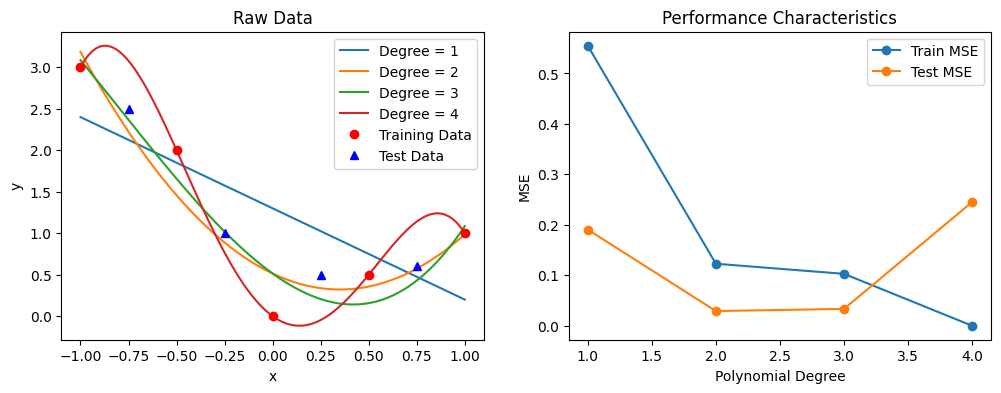

In [1]:
import numpy as np
import matplotlib.pyplot as plt

train_data = np.array(
    [
        [0, 0],
        [1, 1],
        [-1, 3],
        [-0.5, 2],
        [0.5, 0.5]
    ]
)

test_data = np.array(
    [
        [-0.75, 2.5],
        [-0.25, 1.0],
        [0.25, 0.5],
        [0.75, 0.6]
    ]
)

def mse(y_actual, y_pred):
    # Compute the mean squared error of predictions
    return np.mean((y_actual - y_pred)**2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

error = {'train':[], 'test':[]}
for degree in [1, 2, 3, 4]:
    # Fit a polynomial to the training data
    model = np.poly1d(np.polyfit(train_data[:,0], train_data[:,1], deg=degree))

    # Plot a nice curve
    x = np.linspace(-1, 1, 100)
    axes[0].plot(x, [model(x_) for x_ in x], label=f'Degree = {degree}')

    # Compute error
    error['train'].append(
        mse(
            train_data[:, 1],
            np.array([model(x_) for x_ in train_data[:, 0]])
        )
    )
    error['test'].append(
        mse(
            test_data[:, 1],
            np.array([model(x_) for x_ in test_data[:, 0]])
        )
    )

axes[0].plot(train_data[:,0], train_data[:,1], 'ro', label='Training Data')
axes[0].plot(test_data[:,0], test_data[:,1], 'b^', label='Test Data')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Raw Data')
axes[0].legend(loc='best')

axes[1].plot([1, 2, 3, 4], error['train'], 'o-', label='Train MSE')
axes[1].plot([1, 2, 3, 4], error['test'], 'o-', label='Test MSE')
axes[1].set_xlabel('Polynomial Degree')
axes[1].set_ylabel('MSE')
axes[1].set_title('Performance Characteristics')
_ = axes[1].legend(loc='best')

Obviously, a polynomial with a degree that is too small has too much bias, whereas one that is too large has too much variance.  The optimal value is about 2 so that the model performs the best when deployed on real world data collected in the future.  This is a very simple version of a more general approach called cross-validation.

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" align="right" height=300 />

[Cross-validation (CV)](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is used to estimate the generalization error of a model, that is, how well it performs on unseen data. To be accurate, we must avoid testing on data used during model training since the model will be biased to fit that data. Any estimate of model performance using training data will be overly optimistic; however, it is not always clear by how much, and the scarcity of data often drives one to make assumptions that allow this data to be re-used. Various methods of CV exist to balance the amount of effort expended and assumptions made to obtain this estimate.

sklearn has extensive [documentation](https://scikit-learn.org/stable/modules/cross_validation.html) of the different types of cross-validation tools available in the package; however, we will mostly use "stratified, k-fold" CV.  In this type of cross-validation:
* "k-fold" means the data is split into $k$ equal-sized segments (usually after shuffling); training is repeated $k$ times with a different single segment held out as a test set, while the remainder are used for training.
* "stratified" means that the proportion of different classes is kept as constant as possible across the different splits.  For example, if the data is 80% A and 20% B, each split will also be about this ratio.  This is important so you do not end up with strongly biased folds.

For examples of cross-validating pipelines in Python 🐍 with PyChemAuth, please refer to [this notebook](https://pychemauth.readthedocs.io/en/latest/jupyter/learn/cv_optimization.html).